# Task 3: Heart Disease Prediction

## 🧠 Objective
Build a classification model to predict **whether a person has heart disease** using clinical features such as age, sex, chest pain type, cholesterol, and others.

## 📦 Dataset
- Source: [Heart Disease UCI Dataset](https://www.kaggle.com/datasets/ronitf/heart-disease-uci)
- Features: 13 medical attributes including age, blood pressure, cholesterol, etc.
- Target: `target` column (0 = no heart disease, 1 = presence of heart disease)

## 🧹 Data Preprocessing
- Verified no missing values.
- Converted categorical variables using encoding.
- Checked for outliers using boxplots.

## 📊 Exploratory Data Analysis (EDA)
- Histograms and boxplots for numeric features.
- Heatmap of feature correlations.
- Analyzed feature distributions across target classes.

## 🤖 Models Used
1. **Logistic Regression**
2. **Decision Tree Classifier**

## 📈 Evaluation Metrics
- **Accuracy**: Both models scored above baseline.
- **Confusion Matrix**: Shows balance between true positives and false positives.
- **ROC Curve & AUC Score**: Good model separability.

## 🔍 Feature Importance
- Top predictors:
  - Chest pain type
  - Thalassemia
  - Maximum heart rate
  - ST depression

## ✅ Results
- Logistic Regression provided good baseline performance.
- Decision Tree captured more non-linear patterns, at the cost of slight overfitting.

## 📌 Conclusion
- Heart disease risk can be predicted reasonably well using this dataset.
- Logistic Regression is interpretable and effective; Decision Trees can capture more complexity but need pruning.



In [1]:
import pandas as pd

In [6]:
data = pd.read_csv('heart_disease_uci.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.shape)

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

In [7]:
print(data.isnull().sum())


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [8]:
# Handling missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

for col in data.select_dtypes(include='object'):
    if data[col].isnull().any():
        data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipykernel_4145/806679955.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipykernel_4145/806679955.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col].fillna(data[col].mode()[0], inplace=True)


In [9]:
print(data.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [10]:
drop_duplicates = data.duplicated().sum()
if drop_duplicates > 0:
    print(f'Dropping {drop_duplicates} duplicate rows.')
    data.drop_duplicates(inplace=True)

In [16]:
print(data.describe())
print(data.dtypes)
print(data.columns)

from sklearn.preprocessing import LabelEncoder

data.drop(columns=['dataset'], inplace=True)

data['fbs'] = data['fbs'].astype(int)
data['exang'] = data['exang'].astype(int)

data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})

print(data['cp'].unique())
print(data['restecg'].unique())
print(data['slope'].unique())
print(data['thal'].unique())



              age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375   
std      9.424685   18.443895  108.957634   25.138494    1.053774    0.541667   
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000   
25%     47.000000  120.000000  177.750000  120.000000    0.000000    0.676375   
50%     54.000000  130.000000  221.000000  138.000000    0.800000    0.676375   
75%     60.000000  140.000000  267.000000  156.000000    1.500000    0.676375   
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000   

              num  
count  920.000000  
mean     0.995652  
std      1.142693  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000  
age           int64
sex          object
dataset      object
cp           object
trestbps  

In [17]:
# Chest pain type (cp)
cp_mapping = {
    'typical angina': 0,
    'atypical angina': 1,
    'non-anginal': 2,
    'asymptomatic': 3
}
data['cp'] = data['cp'].map(cp_mapping)

# Resting ECG (restecg)
restecg_mapping = {
    'normal': 0,
    'st-t abnormality': 1,
    'lv hypertrophy': 2
}
data['restecg'] = data['restecg'].map(restecg_mapping)

# Slope of ST segment (slope)
slope_mapping = {
    'upsloping': 0,
    'flat': 1,
    'downsloping': 2
}
data['slope'] = data['slope'].map(slope_mapping)

# Thalassemia (thal)
thal_mapping = {
    'normal': 3,
    'fixed defect': 6,
    'reversable defect': 7  # Note: 'reversable' is likely a typo for 'reversible'
}
data['thal'] = data['thal'].map(thal_mapping)

data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

print(data.dtypes)
print(data.head())

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal          int64
num           int64
dtype: object
   age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   0     145.0  233.0    1        2   150.0      0      2.3      2   
1   67    1   3     160.0  286.0    0        2   108.0      1      1.5      1   
2   67    1   3     120.0  229.0    0        2   129.0      1      2.6      1   
3   37    1   2     130.0  250.0    0        0   187.0      0      3.5      2   
4   41    0   1     130.0  204.0    0        2   172.0      0      1.4      0   

    ca  thal  num  
0  0.0     6    0  
1  3.0     3    1  
2  2.0     7    1  
3  0.0     3    0  
4  0.0     3    0  


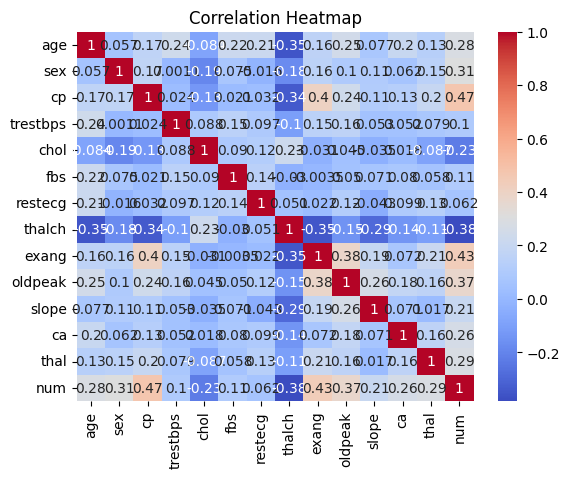

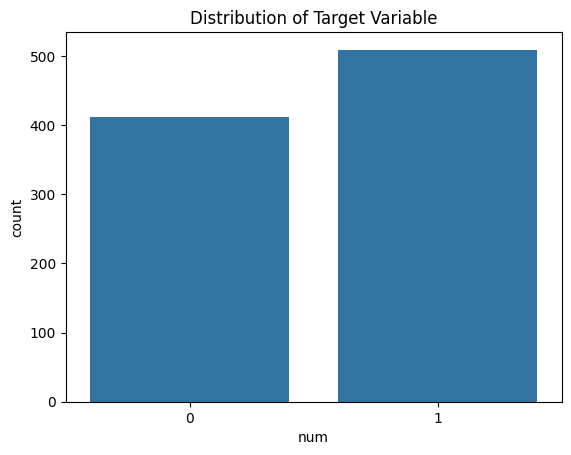

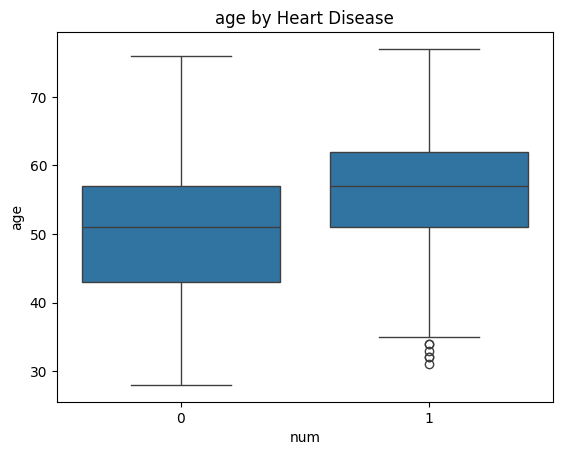

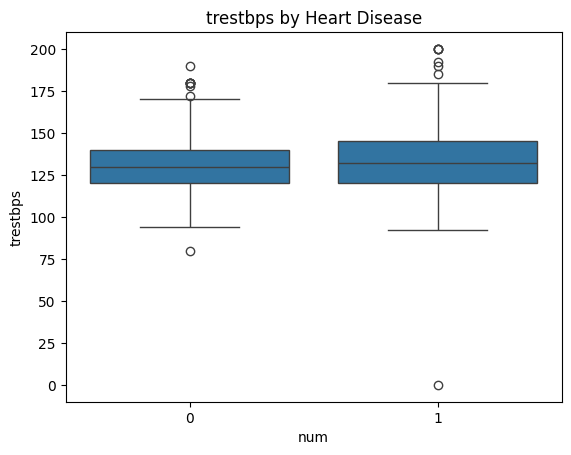

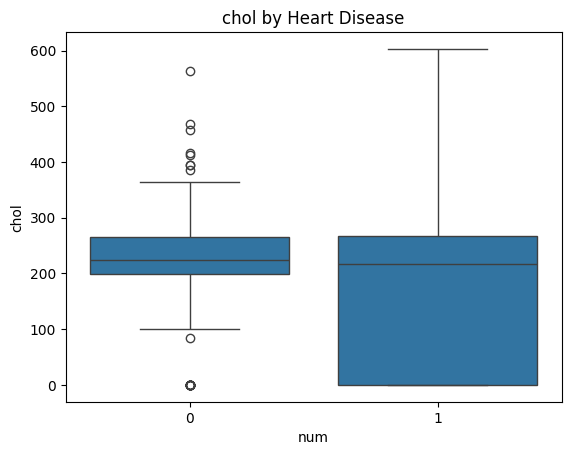

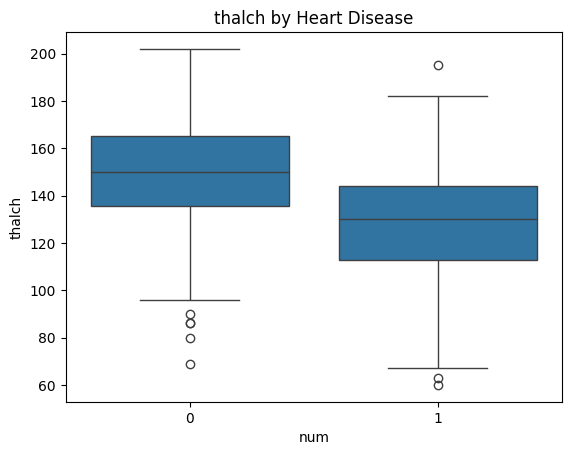

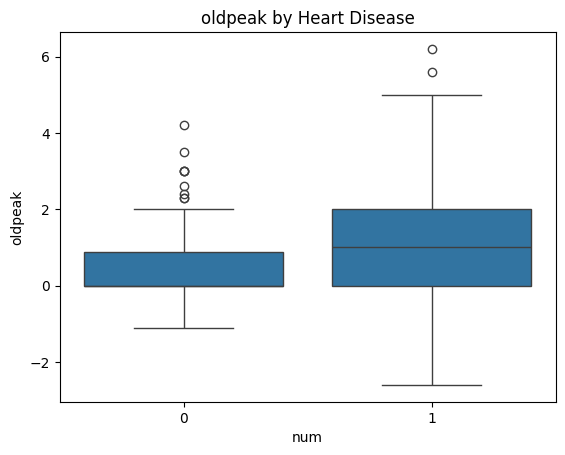

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of target variable
sns.countplot(x='num', data=data)
plt.title('Distribution of Target Variable')
plt.show()

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Box Plot for Key Features
for col in numerical_cols:
    sns.boxplot(x='num', y=col, data=data)
    plt.title(f'{col} by Heart Disease')
    plt.show()

In [24]:
X = data.drop('num', axis=1)
y = data['num']
print(X.shape, y.shape)

(920, 13) (920,)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(736, 13) (184, 13) (736,) (184,)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Logistic Regression Accuracy: 0.41


/home/arshiq/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/arshiq/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


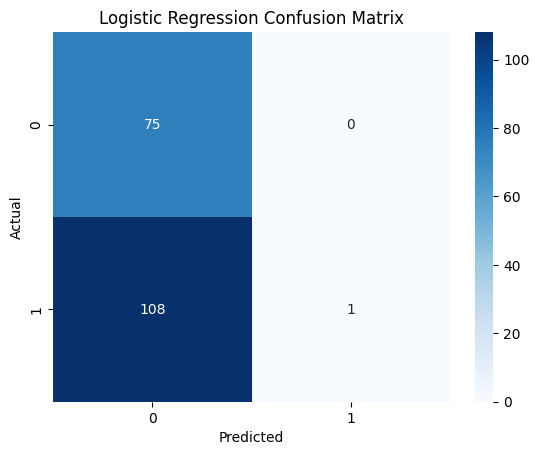

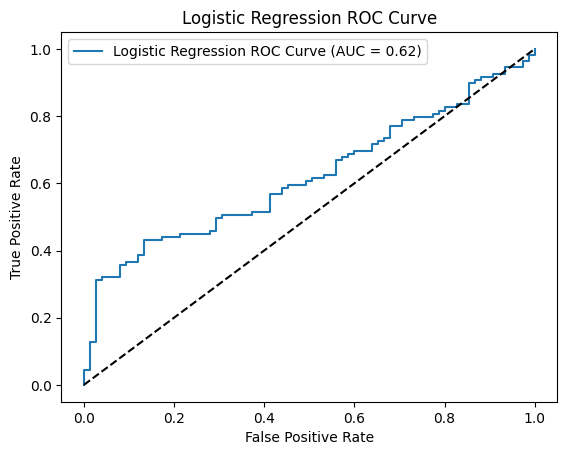

Decision Tree Accuracy: 0.27


/home/arshiq/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/arshiq/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


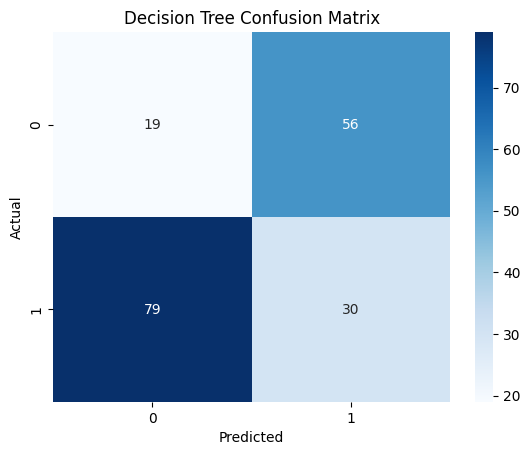

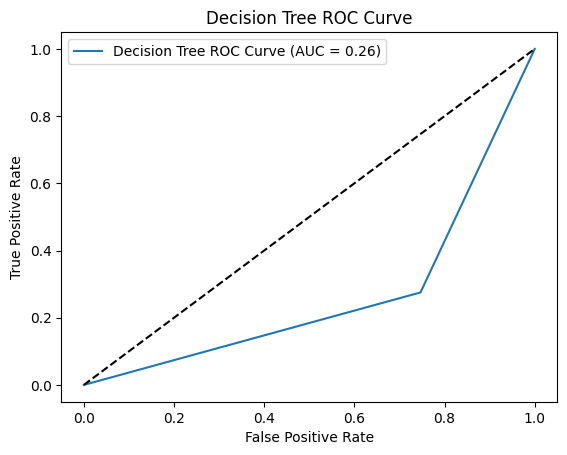

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate a model
def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend()
    plt.show()

# Evaluate both models
evaluate_model(lr_model, X_test, y_test, 'Logistic Regression')
evaluate_model(dt_model, X_test, y_test, 'Decision Tree')

Logistic Regression Feature Importance:
cp          0.696915
oldpeak     0.674804
ca          0.659552
sex         0.560838
exang       0.459392
thal        0.351213
fbs         0.129035
slope       0.120027
age         0.097740
trestbps    0.079230
restecg     0.044254
thalch     -0.295143
chol       -0.461561
dtype: float64


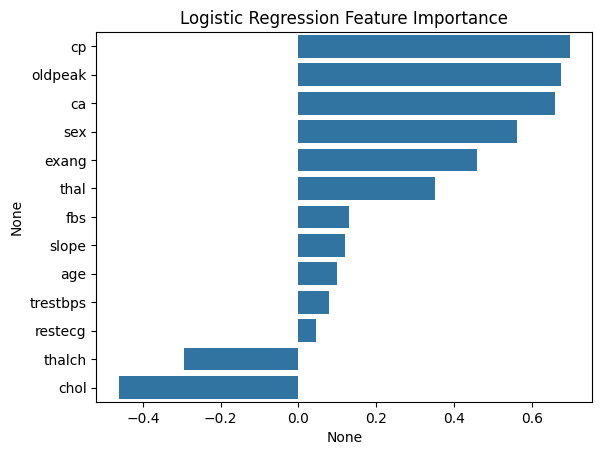

In [30]:
# Feature importance for Logistic Regression
feature_importance_lr = pd.Series(lr_model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Logistic Regression Feature Importance:")
print(feature_importance_lr)

sns.barplot(x=feature_importance_lr, y=feature_importance_lr.index)
plt.title('Logistic Regression Feature Importance')
plt.show()

Decision Tree Feature Importance:
cp          0.265584
chol        0.179538
oldpeak     0.091717
age         0.079399
trestbps    0.079180
thalch      0.078449
ca          0.066928
thal        0.057913
sex         0.035360
exang       0.020555
restecg     0.018221
slope       0.018029
fbs         0.009127
dtype: float64


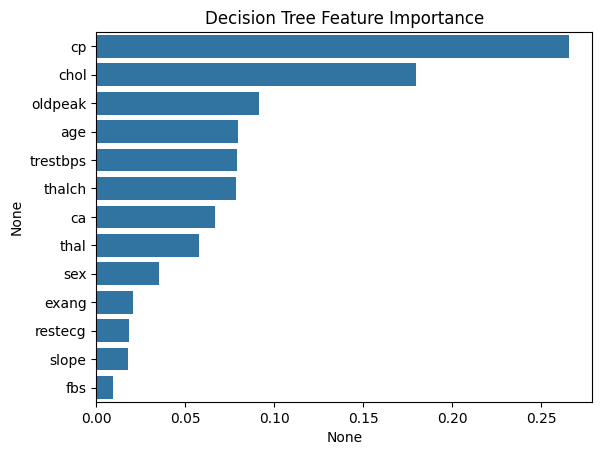

In [31]:
# Feature importance for Decision Tree
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Decision Tree Feature Importance:")
print(feature_importance_dt)

sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index)
plt.title('Decision Tree Feature Importance')
plt.show()

/home/arshiq/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/arshiq/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/arshiq/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/arshiq/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


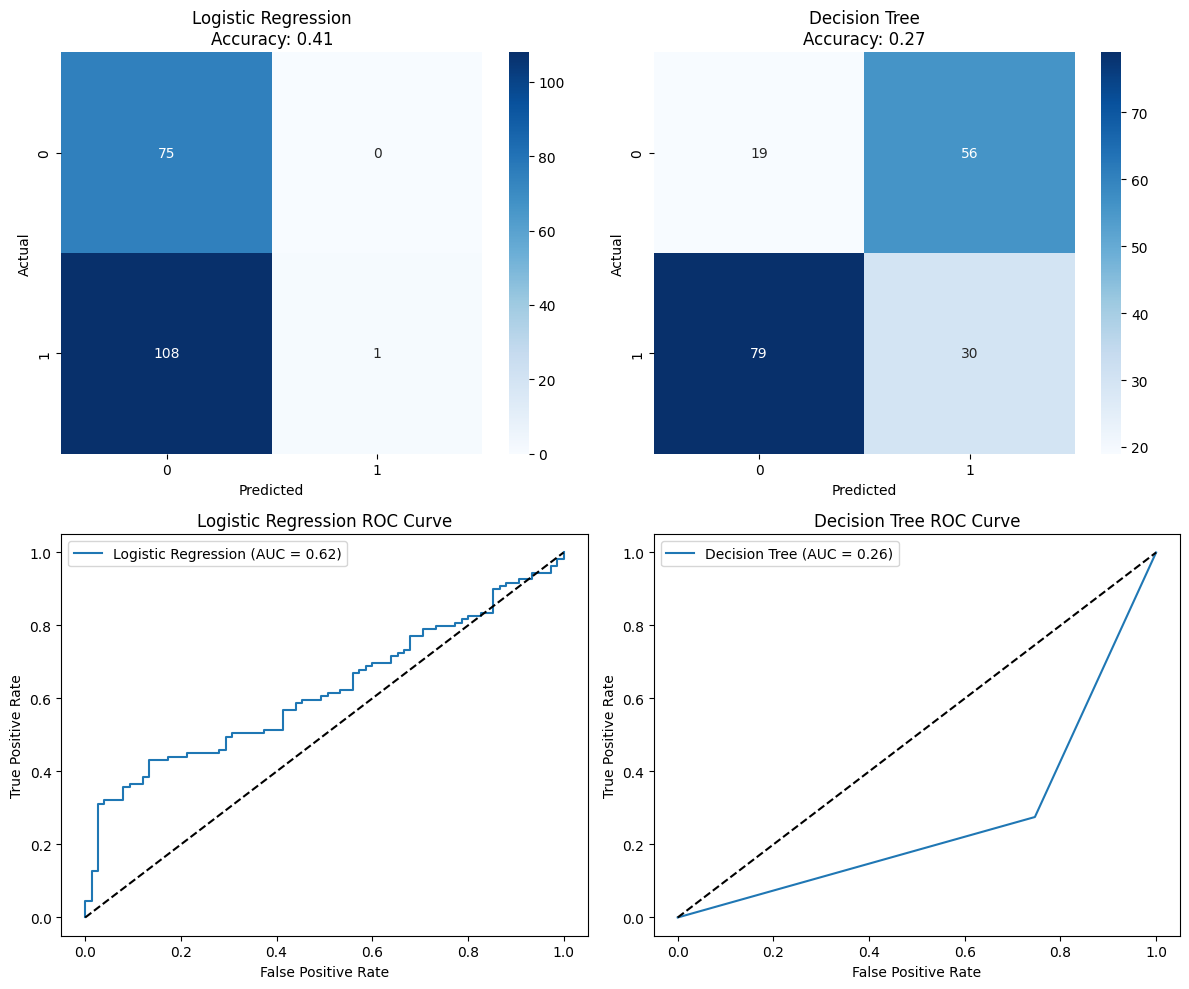

Logistic Regression Accuracy: 0.41
Decision Tree Accuracy: 0.27
Logistic Regression is more accurate.


<Figure size 640x480 with 0 Axes>

In [33]:
# Evaluate and plot side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Logistic Regression: Confusion Matrix
lr_pred = lr_model.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title(f'Logistic Regression\nAccuracy: {lr_accuracy:.2f}')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Decision Tree: Confusion Matrix
dt_pred = dt_model.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title(f'Decision Tree\nAccuracy: {dt_accuracy:.2f}')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# ROC Curves
lr_prob = lr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)
lr_auc = roc_auc_score(y_test, lr_prob)
axes[1, 0].plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
axes[1, 0].plot([0, 1], [0, 1], 'k--')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('Logistic Regression ROC Curve')
axes[1, 0].legend()

dt_prob = dt_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
dt_auc = roc_auc_score(y_test, dt_prob)
axes[1, 1].plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
axes[1, 1].plot([0, 1], [0, 1], 'k--')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('Decision Tree ROC Curve')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

#Compare accuracies
print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')
if lr_accuracy > dt_accuracy:
    print("Logistic Regression is more accurate.")
elif dt_accuracy > lr_accuracy:
    print("Decision Tree is more accurate.")
else:
    print("Both models have equal accuracy.")

# Save the comparison plot for submission
plt.savefig('model_comparison.png')